In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [3]:
original = [
    [4, 4, 4, 4, 4, 4, 4, 4, 4],
    [4, 2, 2, 2, 2, 2, 2, 2, 4],
    [4, 2, 4, 5, 4, 4, 4, 2, 4],
    [4, 2, 4, 3, 4, 3, 4, 2, 4],
    [4, 2, 4, 4, 5, 4, 4, 2, 4],
    [4, 2, 4, 3, 3, 3, 5, 2, 4],
    [4, 2, 5, 4, 4, 4, 4, 2, 4],
    [4, 2, 2, 2, 2, 2, 2, 2, 4],
    [4, 4, 4, 4, 4, 4, 4, 4, 4]
]

original = np.array(original)

In [41]:
# 1. Histogram
hist = np.zeros(8)

for i in range(0, 8):
    hist[i] = np.sum(original == i)

p = hist / np.sum(hist)
cumsum = np.cumsum(p)
new_gray = cumsum * 7
round_new_gray = np.round(new_gray)

df = pd.DataFrame({'hist': hist, 'p': p, 'cumsum': cumsum, 'new_gray': new_gray, 'round_new_gray': round_new_gray}, index=np.arange(0, 8))
df

,hist,p,cumsum,new_gray,round_new_gray
0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,0.000000,0.000000,0.0
2,24.0,0.296296,0.296296,2.074074,2.0
3,5.0,0.061728,0.358025,2.506173,3.0
4,48.0,0.592593,0.950617,6.654321,7.0
5,4.0,0.049383,1.000000,7.000000,7.0
6,0.0,0.000000,1.000000,7.000000,7.0
7,0.0,0.000000,1.000000,7.000000,7.0


In [42]:
# 2. Equalization
equalization = np.zeros((9, 9))
for i in range(9):
    for j in range(9):
        equalization[i, j] = round_new_gray[original[i, j]]

equalization
df = pd.DataFrame(equalization)
df

,0,1,2,3,4,5,6,7,8
0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
1,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
2,7.0,2.0,7.0,7.0,7.0,7.0,7.0,2.0,7.0
3,7.0,2.0,7.0,3.0,7.0,3.0,7.0,2.0,7.0
4,7.0,2.0,7.0,7.0,7.0,7.0,7.0,2.0,7.0
5,7.0,2.0,7.0,3.0,3.0,3.0,7.0,2.0,7.0
6,7.0,2.0,7.0,7.0,7.0,7.0,7.0,2.0,7.0
7,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
8,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0


In [43]:
cv2.imwrite('equalization.png', equalization * 32)

True

In [35]:
cv2.imwrite('original_3.png', original * 32)

True

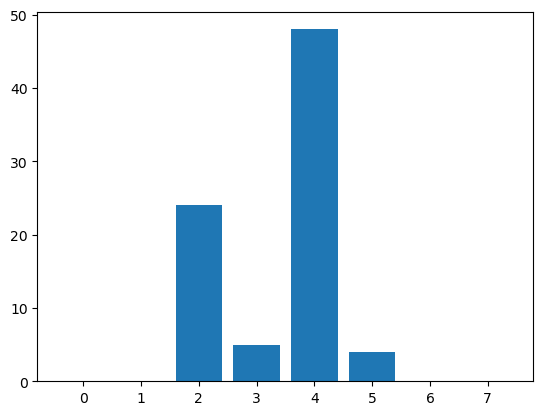

In [46]:
# Original Histogram
plt.bar(np.arange(0, 8), hist)
plt.show()

<BarContainer object of 8 artists>

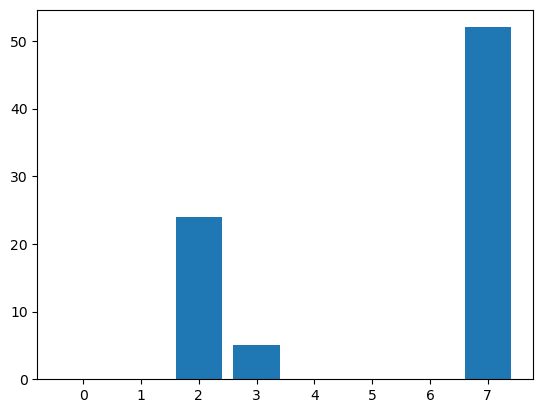

In [48]:
# Equalization Histogram

hist = np.zeros(8)
for i in range(8):
    hist[i] = np.sum(equalization == i)

plt.bar(np.arange(0, 8), hist)

In [49]:
df = pd.DataFrame({"hist": hist})

In [50]:
df

,hist
0,0.0
1,0.0
2,24.0
3,5.0
4,0.0
5,0.0
6,0.0
7,52.0


: 